# <center>Capital asset price model project</center>
### **<center> Expected return calculation of the Microsoft stock using the CAPM formula </center>**

### **<center>Mijail Dragowski</center>**
### **<center>2023</center>**

## Import the necessary libraries


In [1]:
import yfinance as yf
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Microsoft Stock data


In [2]:
Microsoft=yf.download("MSFT", start="2017-01-01", end="2022-12-31")
Microsoft.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,57.501350,20694100
2017-01-04,62.480000,62.750000,62.119999,62.299999,57.244064,21340000
2017-01-05,62.189999,62.660000,62.029999,62.299999,57.244064,24876000
2017-01-06,62.299999,63.150002,62.040001,62.840000,57.740250,19922900
2017-01-09,62.759998,63.080002,62.540001,62.639999,57.556488,20382700


## Load the S&P 500 ETF data

In [3]:
S_P500=yf.download("SPY", start="2017-01-01", end="2022-12-31")
S_P500.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,202.856552,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,204.063370,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,203.901276,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,204.630768,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,203.955307,46939700


## Adjusted closing price time series chart


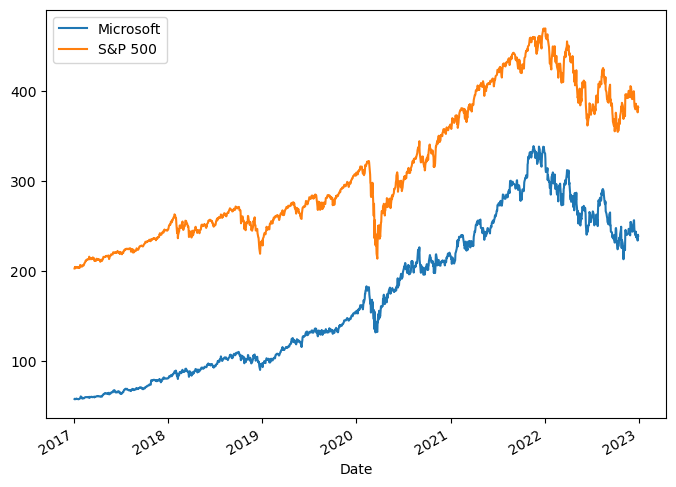

In [4]:
Microsoft['Adj Close'].plot(label='Microsoft',figsize=(8,6))
S_P500['Adj Close'].plot(label="S&P 500")
plt.legend()


## Cumulative return calculation


In [5]:
Microsoft["cumulative return"]=Microsoft['Adj Close']/Microsoft['Adj Close'].iloc[0]
S_P500["cumulative return"]=S_P500['Adj Close']/S_P500['Adj Close'].iloc[0]

##  Cumulative return graph


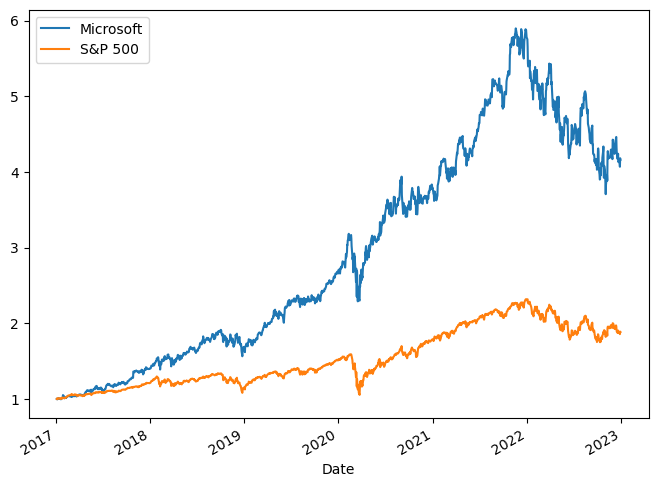

In [6]:
Microsoft['cumulative return'].plot(label='Microsoft',figsize=(8,6))
S_P500['cumulative return'].plot(label="S&P 500")
plt.legend()

## Generate a data frame with the daily return of the market and microsoft stock


In [7]:
Microsoft["Daily return"]= Microsoft['Adj Close'].pct_change(1)
S_P500["Daily return"]= S_P500['Adj Close'].pct_change(1)
DR= pd.merge(Microsoft[['Daily return']], S_P500[['Daily return']], left_index=True, right_index=True)
DR.columns = ['Daily_return_MSFT', 'Daily_return_SP500']
DR.head()

,Daily_return_MSFT,Daily_return_SP500
Date,,
2017-01-03,NaN,NaN
2017-01-04,-0.004474,0.005949
2017-01-05,0.000000,-0.000794
2017-01-06,0.008668,0.003578
2017-01-09,-0.003183,-0.003301


## Linear regression to calculate the beta


In [8]:
model= smf.ols("Daily_return_MSFT ~ Daily_return_SP500",DR)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Daily_return_MSFT   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     3718.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:29:55   Log-Likelihood:                 4839.1
No. Observations:                1509   AIC:                            -9674.
Df Residuals:                    1507   BIC:                            -9663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0005      0.000      1.972      0.049    2.55e-06       0.001
Daily_return_SP500     1.2300      0.020     60.977      0.000       1.190       1.270
==============================================================================
Omnibus:                      160.857   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1139.772
Skew:                           0.191   Prob(JB):                    3.17e-248
Kurtosis:                       7.240   Cond. No.                         79.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Components of the CAPM formula



In [11]:
Market_return=((S_P500['Adj Close'].iloc[-1]/S_P500['Adj Close'].iloc[0])-1)
Risk_free_rate= 0.0418
beta= 1.23
print(" the beta is {} " .format(beta))
print(" the risk free rate is {} percent" .format(Risk_free_rate*100))
print(" the market return in the period was {} percent" .format(Market_yield*100))

 the beta is 1.23 
 the risk free rate is 4.18 percent
 the market return in the period was 88.52237636473743 percent


## Expected return of the Microsoft stock according to the CAPM formula


In [12]:
Ex_return= Risk_free_rate + beta*(Market_return-Risk_free_rate)
print(" the expected return of the stock is {} percent" .format(Ex_return*100))



 the expected return of the stock is 107.92112292862706 percent
